## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
combined_data = combined_data.rename(columns={"Mouse ID":"Mouse_ID"})
# Display the data table for preview
combined_data.head()

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_data.count()

Mouse_ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id = combined_data.groupby("Mouse_ID")

#Count the number of times each id appears in the data
mouse_id_unique = mouse_id.count()

#Sort Data in Descending order by number of results
mouse_id_unique.sort_values(by=["Drug Regimen"], inplace=True, ascending=False)

# Find any mouse with more than 10 test results(g989)
#mouse_id_unique


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data.Mouse_ID != "g989"]
cleaned_data

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse_ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# Groupby Drug Regimen
regimen_df = cleaned_data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = regimen_df["Tumor Volume (mm3)"].mean()
tumor_median = regimen_df["Tumor Volume (mm3)"].median()
tumor_variance = regimen_df["Tumor Volume (mm3)"].var()
tumor_stdev = regimen_df["Tumor Volume (mm3)"].std()
tumor_SEM = regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
Regimen_Stats_df = pd.DataFrame({"Tumor Mean": tumor_mean,
                                 "Tumor Median": tumor_median,
                                 "Tumor Variance": tumor_variance,
                                 "Tumor Standard Deviation": tumor_stdev,
                                 "Tumor SEM": tumor_SEM})
#Print Data Frame
Regimen_Stats_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



Text(0, 0.5, 'Number of Measurements')

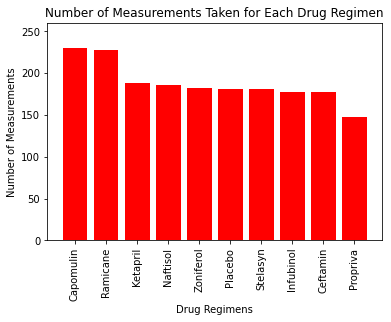

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Count the number of measurements per Drug Regimen
counts = cleaned_data["Drug Regimen"]. value_counts()

#Set x_axis as number of Drug Regimens
x_axis = np.arange(len(counts))

#Create our basic Bar Graph
plt.bar(x_axis, counts, width=0.8, color="r")

#Tell matplotlib where to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

#Rotate x axis headers for better visibility
plt.xticks(rotation = 90)

#set y axis limit
plt.ylim(0, max(counts)+30)

#Give the chart labels and a title
plt.title("Number of Measurements Taken for Each Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements")


Text(0, 0.5, ' ')

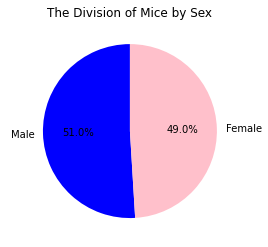

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Count number of Male and Female Mice
data = cleaned_data["Sex"].value_counts()

pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title="The Division of Mice by Sex", colors=["blue","pink"])

pie_plot.set_ylabel(" ")


Text(0.5, 1.0, 'The Division of Mice by Sex')

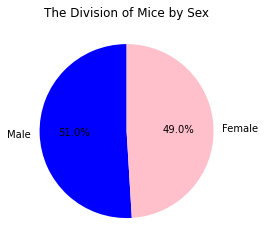

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Count number of Male and Female Mice
data = cleaned_data["Sex"].value_counts()

#Create labels for our chart
labels = ["Male", "Female"]

#Set the colors of each section of the pie chart
colors = ["blue", "pink"]

#Plot the data in a Pie Chart
plt.pie(data, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)

#Give the chart a Title
plt.title("The Division of Mice by Sex")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
